# Содиков Фарход, ПИ19-1, ML3

In [48]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import subprocess
import os

## Задание №1. Построить график функции y(x) = x2 + x + 1, x = -4, … , 4, оформив его по аналогии с рис.1, т.е. добавив аннотации, обозначения осей Ox и Oy, заголовок, содержащий формулу функции.

In [49]:
def function(x):
    return -x**2 + x + 1

In [50]:
x = np.linspace(-4, 4, num=10000)
y = function(x)
x_ = -3

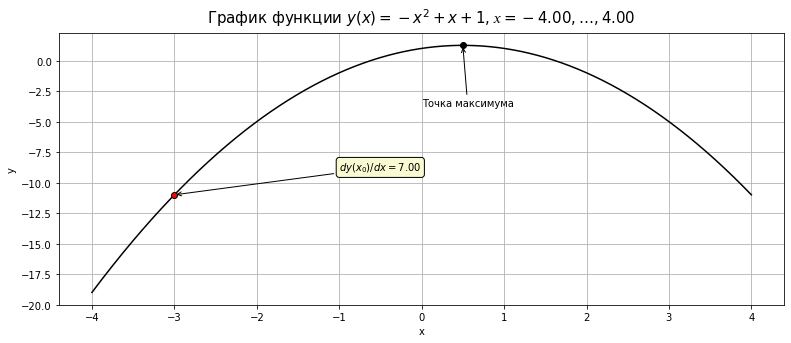

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 5)
ax.plot(x, y, color = 'black')
ax.grid()
ax.set_title(r'График функции $у(x) = -x^{2} + x + 1, 𝑥 = -4.00, … , 4.00$',
             fontsize = 15, 
             pad = 10
            )

# axis
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.plot(x[np.where(y == y.max())], y.max(), marker = 'o', color = 'k', ls = '') 
ax.plot(x_, function(x_), marker = 'o', color = 'k', ls = '', markerfacecolor = 'r') 

arrowprops = {
    'arrowstyle': '->',
}

ax.annotate('Точка максимума',
             xy = (x[np.where(y == y.max())], y.max()),
             xytext=(0, y.max() -5),
             arrowprops = arrowprops)

ax.annotate(r'$dy(x_{0})/dx = 7.00$',
             xy=(x_, function(x_)),
             xytext=(x_ + 2, function(x_) + 2),
             arrowprops=arrowprops,
             bbox=dict(boxstyle = "round", fc = "lightgoldenrodyellow"),)

fig.savefig('./output/task1.png', dpi = 150)
plt.show()

## Задание №2. Построить график функции распределения простых чисел. См. дополнительные указания раздел 1

In [57]:
numbers = np.genfromtxt('./data/primes1.txt',dtype = 'int', skip_header=4)
numbers = numbers.flatten()

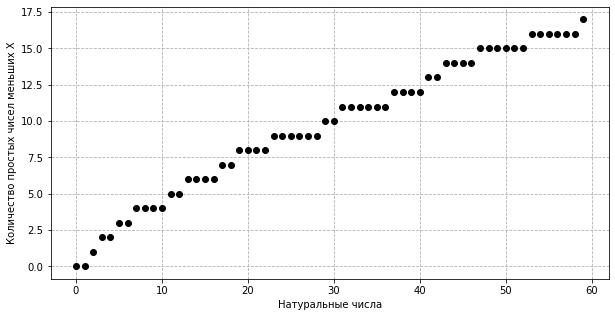

In [59]:
x = np.arange(60)
y = [numbers[numbers <= i].size for i in x]
fig = plt.figure(figsize = (10, 5))
plt.step(x, y, 'o', color = 'black')
plt.xlabel("Натуральные числа")
plt.ylabel("Количество простых чисел меньших Х")
plt.grid(linestyle = '--')
plt.show()

fig.savefig('./output/task2-1.png', dpi = 150)

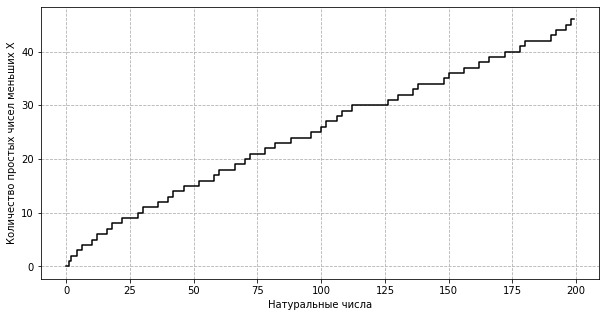

In [60]:
x = np.arange(200)
y = [numbers[numbers <= i].size for i in x]
fig = plt.figure(figsize = (10, 5))
plt.step(x, y, color = 'black')
plt.xlabel("Натуральные числа")
plt.ylabel("Количество простых чисел меньших Х")
plt.grid(linestyle = '--')
plt.show()

fig.savefig('./output/task2-2.png', dpi = 150)

## Задание №3. Построить графики параметрических кривых эллипса и гиперболы. Дополнительные указания см. в раздел 2.

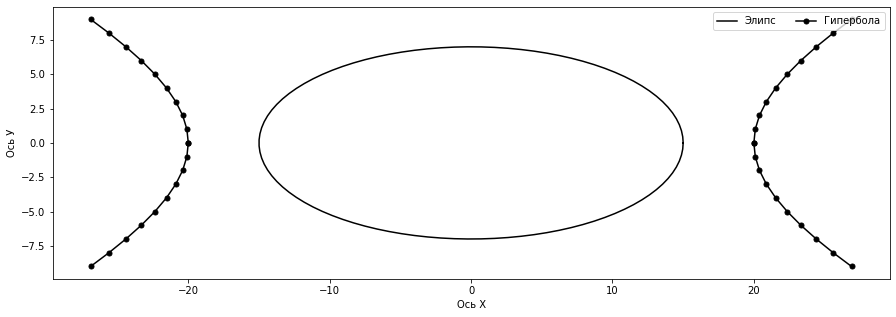

In [61]:
x = [] 
x2 = []
y = []
y2 = []

xPos = yPos = 0 
a = 15 
b = 7 

fig = plt.figure(figsize = (15, 5))
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(xPos + a * np.cos(t) , yPos + b * np.sin(t), color = 'black', label = 'Элипс')
plt.grid()

for i in range(10):
    a = 10
    b = 20
    x.append(-i)
    x2.append(i)
    y.append(np.sqrt(b** 2 + (b**2 * (i**2 / a**2))))
    y2.append(-np.sqrt(b**2 + (b**2 * (i**2 / a**2))))

plt.plot(y, x, color = 'black', marker = 'o', markersize = 5)
plt.plot(y2, x, color = 'black' , marker = 'o', markersize = 5)
plt.plot(y2, x2, color = 'black' , marker = 'o', markersize = 5)
plt.plot(y, x2, color = 'black' , marker = 'o', markersize = 5, label = 'Гипербола')
plt.xlabel("Ось Х")
plt.ylabel("Ось У")
plt.grid(linestyle = '--')
plt.legend(loc = 'upper right', ncol = 2)
plt.show()

fig.savefig('./output/task3.png', dpi = 150)

## Задание №4. Построить вектор, начинающийся в точке (0, 0; 0, 0). Реализуйте анимацию вращения вектора по и против часовой стрелки. Дополнительный указания см. в разделе 3.

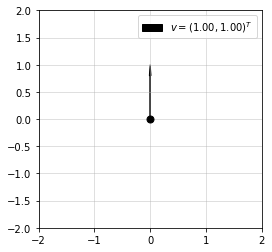

In [56]:
# против часовой

clockWiseFolder = './output/clockwise'
counterClockWiseFolder = './output/counterclock-wise'

try:
    os.mkdir(clockWiseFolder) 
    os.mkdir(counterClockWiseFolder) 
except FileExistsError:
    pass

fig = plt.figure(1)
ax = fig.add_subplot()
ax.plot(0, 0, "ko", markersize = 7)
ax.set_ylim(-2, 2, 1) 
ax.set_xlim(-2, 2, 1)
fig.set_size_inches(4, 4)


patch = patches.Arrow(0, 0, np.sin(0), np.cos(1), 
                      width = 0.5, 
                      color = 'black', 
                      label = r'$v = (1.00, 1.00)^{T}$'
                     )
ax.add_patch(patch)
ax.legend(loc = 'upper right', ncol = 2)
plt.grid(alpha = .5)


# counterclock-wise
v = np.linspace(2 * np.pi, 0, 100)
counter = 0
for i in v:
    
    ax.patches = []
    patch = patches.Arrow(0, 0, np.sin(i), np.cos(i), 
                          width = 0.05, 
                          color = 'black', 
                          label = r'$v = (1.00, 1.00)^{T}$'
                         )
    ax.add_patch(patch)
    ax.legend(loc = 'upper right', ncol = 2)
    fig.savefig('{0}/{1:03d}.png'.format('./output/counterclock-wise', counter), dpi = 300, format = 'png')
    counter += 1
    
    
# clockwise
v = np.linspace(0, 2 * np.pi, 100)
counter = 0
for i in v:
    
    ax.patches = []
    patch = patches.Arrow(0, 0, np.sin(i), np.cos(i), 
                          width = 0.05,
                          color = 'black',
                          label = r'$v = (1.00, 1.00)^{T}$'
                         )
    ax.add_patch(patch)
    ax.legend(loc = 'upper right', ncol = 2)
    fig.savefig('{0}/{1:03d}.png'.format('./output/clockwise', counter), dpi = 300, format = 'png')
    counter += 1

In [13]:
# counterClock-Wise
FFMPEG = '/usr/local/bin/ffmpeg'
CMD = [FFMPEG, '-y', '-r', '30', '-f', 'image2', '-i', 'clock/%03d.png'.format(counterClockWiseFolder), 
       '-vcodec', 'libx264', '-crf', '25', '-pix_fmt', 'yuv420p',  '-vf', 'scale=300:300', './output/counterclock-wise.mp4'] 
subprocess.run(CMD)

In [14]:
# clockwise
FFMPEG = '/usr/local/bin/ffmpeg'
CMD = [FFMPEG, '-y', '-r', '30', '-f', 'image2', '-i', 'clock_backward/%03d.png'.format(clockWiseFolder), 
       '-vcodec', 'libx264', '-crf', '25', '-pix_fmt', 'yuv420p',  '-vf', 'scale=300:300', './output/clockwise.mp4'] 
subprocess.run(CMD)